#                     <font color='green'>Delhivery Feature Engineering</font>

---


<font color='black'>
 **Introduction :**   
                                                         
 Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating
 the commerce operating system.
 They achieve this by utilizing world-class infrastructure, ensuring the highest quality in
 logistics operations, and harnessing cutting-edge engineering and technology capabilities
 </font>
<font color='black'>

**Purpose of the Business Case Study:**
 The study ensures data accuracy by fixing missing values and organizing the dataset. It identifies key features from raw data for better forecasting and finds patterns and recommendations to improve logistics.
 </font>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
To: /content/delhivery_data.csv?1642751181
100% 55.6M/55.6M [00:04<00:00, 12.0MB/s]


In [ ]:
data=pd.read_csv("/content/delhivery_data.csv?1642751181")

<font color='red'>***Data Exploration***</font>





In [ ]:
data.sample(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_cumsum,segment_osrm_distance_cumsum,segment_osrm_time_cumsum
75973,training,2018-09-20 20:51:06.829984,thanos::sroute:67c77992-49e3-4594-9a75-9861ef0...,FTL,trip-153747666682973236,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND131028AAB,Sonipat_Kundli_H (Haryana),2018-09-20 20:51:06.829984,...,983.0,1337.8704,1.828077,30.0,18.0,25.5236,trip-153747666682973236-IND421302AAG-IND131028AAB,1779.0,1410.9235,1050.0
94114,test,2018-09-27 00:59:45.758955,thanos::sroute:1d848e84-b73b-47b3-90ec-4a12509...,FTL,trip-153800998575871469,IND508223AAA,Thirumalagiri_Xroad_D (Telangana),IND500039AAC,Hyderabad_Uppal_I (Telangana),2018-09-27 04:16:06.654776,...,89.0,124.0308,1.685393,10.0,5.0,6.1086,trip-153800998575871469-IND508223AAA-IND500039AAC,149.0,110.6206,100.0
56926,test,2018-09-28 16:15:13.294640,thanos::sroute:6ce329f9-0cf6-40bc-8197-6f8acc6...,Carting,trip-153815131329438087,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND400072AAB,Mumbai Hub (Maharashtra),2018-09-28 16:15:13.294640,...,21.0,26.0158,2.857143,0.0,0.0,0.0000,trip-153815131329438087-IND421302AAG-IND400072AAB,59.0,26.0158,20.0
59811,training,2018-09-12 10:32:39.025066,thanos::sroute:6f20715d-5684-4595-a986-2836d48...,FTL,trip-153674835902479284,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-12 10:32:39.025066,...,337.0,454.8844,2.091988,39.0,24.0,30.6832,trip-153674835902479284-IND000000ACB-IND421302AAG,699.0,464.5839,352.0
65372,training,2018-09-19 08:32:50.572008,thanos::sroute:6c488175-9e94-44b2-b01a-69621bf...,FTL,trip-153734597057178161,IND302014AAA,Jaipur_Hub (Rajasthan),IND305001AAC,Ajmer_FoySGRRD_I (Rajasthan),2018-09-19 08:32:50.572008,...,43.0,56.4433,2.534884,64.0,22.0,32.4936,trip-153734597057178161-IND302014AAA-IND305001AAC,109.0,56.4433,42.0


In [ ]:
data.shape

(144867, 24)

  <font color='black'> The dataset has 144,867 rows and 24 columns.</font>


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

<font color='black'> Initially, the dataset had 24 columns, of which 12 were of object data type, 10 were float, data type, and the remaining columns were of boolean and integer data types.</font>

In [ ]:
data.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0



 <font color='red'>  **Missing value treatment :** </font>

In [ ]:
Percentage_of_missing_value = (data.isnull().sum() / len(data))*100
Percentage_of_missing_value.sort_values(ascending=False).head(5)

,0
source_name,0.202254
destination_name,0.180165
data,0.000000
cutoff_factor,0.000000
segment_osrm_distance,0.000000


<font color='black'> The columns 'source name' and 'destination name' have missing values of 0.20% and 0.18%, respectively. Since this represents a very small fraction of the dataset, I am dropping the null values.




In [ ]:
data=data.dropna()

In [ ]:
data.isna().sum().sum()

0

<font color='black'> **Correct the data types of the datetime columns.**

In [ ]:
data['trip_creation_time']=pd.to_datetime(data['trip_creation_time'], errors='coerce')

In [ ]:
data['od_start_time']=pd.to_datetime(data['od_start_time'],errors='coerce')

In [ ]:
data['od_end_time']=pd.to_datetime(data['od_end_time'],errors='coerce')

In [ ]:
data['cutoff_timestamp']=pd.to_datetime(data['cutoff_timestamp'],errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [ ]:
data.nunique()

,0
data,2
trip_creation_time,14787
route_schedule_uuid,1497
route_type,2
trip_uuid,14787
source_center,1496
source_name,1496
destination_center,1466
destination_name,1466
od_start_time,26223


In [ ]:
data.describe(include="float64")

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
std,1038.082976,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804
min,20.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,161.000000,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,451.000000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,1645.000000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


In [ ]:
data.describe(include="object")

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144316,144316,144316,144316,144316,144316,144316,144316
unique,2,1497,2,14787,1496,1496,1466,1466
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104632,1812,99132,101,23267,23267,15192,15192


In [ ]:
# Creating the new column segment_key.
data["segment_key"] = data["trip_uuid"] + "-" + data["source_center"]+ "-" + data["destination_center"]

In [ ]:
data["segment_key"].value_counts()

,count
segment_key,
trip-153755502932196495-IND160002AAC-IND562132AAA,81
trip-153802876613714747-IND000000ACB-IND600056AAB,79
trip-153690920439662353-IND000000ACB-IND600056AAB,79
trip-153854253003897121-IND000000ACB-IND600056AAB,79
trip-153751271053200074-IND000000ACB-IND600056AAB,79
...,...
trip-153852148377777486-IND411033AAA-IND410503AAA,1
trip-153673275082213870-IND151001AAA-IND160002AAC,1
trip-153747548760214385-IND621802AAA-IND608301AAA,1


<font color='black'> **Creating new columns to store aggregated values at the segment level.**

In [ ]:
data["segment_actual_time_cumsum"]=data.groupby("segment_key")["segment_actual_time"].transform("cumsum")

In [ ]:
data["segment_osrm_distance_cumsum"]=data.groupby("segment_key")["segment_osrm_distance"].transform("cumsum")

In [ ]:
data["segment_osrm_time_cumsum"]=data.groupby("segment_key")["segment_osrm_time"].transform("cumsum")

In [ ]:
data.sample()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_cumsum,segment_osrm_distance_cumsum,segment_osrm_time_cumsum
24010,training,2018-09-17 13:03:29.015263,thanos::sroute:a97500f3-bbd4-4901-bcf1-e351aa8...,FTL,trip-153718940901502017,IND327001AAB,Banswara_KhandDPP_D (Rajasthan),IND312605AAB,Pratapgarh_Nimachrd_D (Rajasthan),2018-09-18 00:15:43.966174,...,36.7734,1.307692,34.0,26.0,36.7734,1.307692,trip-153718940901502017-IND327001AAB-IND312605AAB,34.0,36.7734,26.0


<font color='black'> **Dropping columns that do not seem essential for analysis.**


In [ ]:
data.drop(columns=["is_cutoff","cutoff_factor","cutoff_timestamp","segment_factor"],inplace=True)

In [ ]:
#  Segment dictionary to aggregate and select values.
create_segment_dict = {
    'data': 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'trip_uuid': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'first',
    'destination_name': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last',
    'segment_actual_time_cumsum': 'last',
    'segment_osrm_time_cumsum': 'last',
    'segment_osrm_distance_cumsum': 'last'
}

In [ ]:
# Group by Segement_key
segment_df = data.groupby('segment_key').agg(create_segment_dict).reset_index()

In [ ]:
# Order the dataset by segment_key and od_end_time.
segment_df.sort_values(by=['segment_key', 'od_end_time'], ascending=[True, True], inplace=True)

In [ ]:
segment_df.head(5)

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum
0,trip-153671041653548748-IND209304AAA-IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,22680.0,3778.765471,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748-IND462022AAA-IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,20979.0,5082.046634,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164-IND561203AAB-IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,174.0,53.310332,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164-IND572101AAA-IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,732.0,186.897974,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517-IND000000ACB-IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,10008.0,1725.590250,611.0,212.0,281.2109,608.0,231.0,317.7408


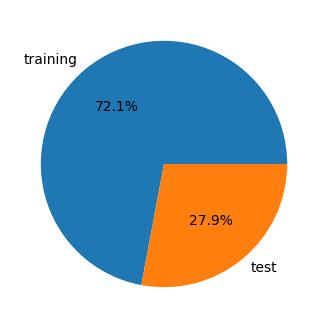

In [ ]:
# pecentage of data vs traing data in datafram

plt.figure(figsize=(4, 4))
plt.pie(segment_df["data"].value_counts(),labels=segment_df["data"].value_counts().index,autopct="%1.1f%%")
plt.show()

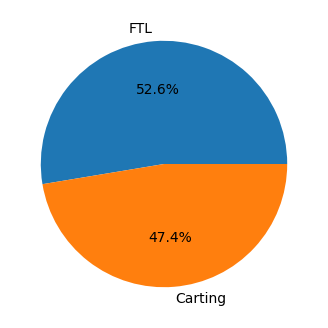

In [ ]:
# Percentage of route types for trips

plt.figure(figsize=(4, 4))
plt.pie(segment_df["route_type"].value_counts(),labels=segment_df["route_type"].value_counts().index,autopct="%1.1f%%")
plt.show()

<font color='black'> 52.5% of trips have the route type FTL, while 47.4% have the carting route type.

<font color='black'> a. FTL (Full Truck Load): FTL shipments reach their destination sooner, as the truck makes no other pickups or drop-offs along the way.

<font color='black'> b. Carting: A handling system that consists of small vehicles (carts).

In [ ]:
segment_df.groupby["data"].value_counts(normalize=True)

,,proportion
segment_key,data,
trip-153671042288605164-IND561203AAB-IND562101AAA,training,1.0
trip-153671042288605164-IND572101AAA-IND561203AAB,training,1.0
trip-153671046011330457-IND400072AAB-IND401104AAA,training,1.0
trip-153671052974046625-IND583101AAA-IND583201AAA,training,1.0
trip-153671052974046625-IND583119AAA-IND583101AAA,training,1.0
...,...,...
trip-153861115439069069-IND628204AAA-IND627657AAA,test,1.0
trip-153861115439069069-IND628613AAA-IND627005AAA,test,1.0
trip-153861115439069069-IND628801AAA-IND628204AAA,test,1.0


# <font color='red'> Feature Engineering:</font>

<font color='black'> **Create a new column for the time difference between the trip start time and trip end time, which will represent the total duration of the trip.**

In [ ]:
#  Calculate the time taken between od_start_time and od_end_time in hours.

segment_df["od_time_diff_hour"]=segment_df['od_end_time'] - segment_df['od_start_time']
segment_df["od_time_diff_hour"]=(segment_df["od_time_diff_hour"].dt.total_seconds())/3600

<font color='black'> **Extract the source and destination details to create new columns for the source and destination state, city, and place.**

In [ ]:
 # Split the source_name to separate state
source=segment_df["source_name"].str.split("(",expand=True)

 # Extract source state
segment_df["source_state"]=source[1].str.rstrip(")")

 # Extract city and place from the first part
segment_df["source_city"]=source[0].str.split("_",expand=True)[0]
segment_df["source_place"]=source[0].str.split("_",expand=True)[1]

 # Extract code
source_list=source[0].str.split("_",expand=True)
source_list[3].fillna("", inplace=True)
segment_df["source_code"]= np.where(source_list[3]!="",source_list[2]+"_"+source_list[3],source_list[2])

In [ ]:
 # Split the source_name to separate state
destination=segment_df["destination_name"].str.split("(",expand=True)

 # Extract source state
segment_df["destination_state"]=destination[1].str.rstrip(")")

 # Extract city and place from the first part
segment_df["destination_city"]=destination[0].str.split("_",expand=True)[0]
segment_df["destination_place"]=destination[0].str.split("_",expand=True)[1]

# Extract Code
destination_code=destination[0].str.split("_",expand=True)
destination_code[3].fillna("", inplace=True)
segment_df["destination_code"]= np.where(destination_code[3]!="",destination_code[2]+"_"+ destination_code[3], destination_code[2])

<font color='black'>  **Now I have columns for the state and city of the source and destination,
therefore, delete the columns 'source name' and 'destination' since they are no longer needed.**

In [ ]:
segment_df.drop(columns=["source_name","destination_name"],inplace=True)

<font color='black'>  **Extract month, year, day from column trip creation**

In [ ]:
segment_df["trip_creation_year"]=segment_df["trip_creation_time"].dt.year
segment_df["trip_creation_month"]=segment_df["trip_creation_time"].dt.month
segment_df["trip_creation_day"]=segment_df["trip_creation_time"].dt.day

In [ ]:
segment_df.sample()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,...,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_day
8452,trip-153729810530379286-IND000000ACB-IND390022AAA,training,2018-09-18 19:15:05.304017,thanos::sroute:061cbd67-f34d-4ccd-b81d-557b8bd...,FTL,trip-153729810530379286,IND000000ACB,IND390022AAA,2018-09-18 21:19:29.218846,2018-09-19 19:46:55.217392,...,Gurgaon,Bilaspur,HB,Gujarat,Vadodara,Karelibaug,DPC,2018,9,18


# <font color='red'> In-depth analysis:  </font>


In [ ]:
# Performing grouping and aggregating values at the trip-level

# Actual aggregated time
segment_df["trip_actual_time_sum"]=segment_df.groupby("trip_uuid")["actual_time"].transform("sum")

# Actual aggregated distance.
segment_df["actual_distance_to_destination_sum"]=segment_df.groupby("trip_uuid")["actual_distance_to_destination"].transform("sum")

# OSRM aggregate time.
segment_df["trip_osrm_time_sum"]=segment_df.groupby("trip_uuid")["osrm_time"].transform("sum")

# OSRM aggregted distance
segment_df["trip_osrm_distance_sum"]=segment_df.groupby("trip_uuid")["osrm_distance"].transform("sum")

# Segment aggregate actual time
segment_df["trip_segment_actual_time_sum"]=segment_df.groupby("trip_uuid")["segment_actual_time_cumsum"].transform("sum")

# Segment OSRM aggregated time
segment_df["trip_segment_osrm_time_sum"]=segment_df.groupby("trip_uuid")["segment_osrm_time_cumsum"].transform("sum")

# segment OSRM aggregated distance
segment_df["trip_segment_osrm_distance_sum"]=segment_df.groupby("trip_uuid")["segment_osrm_distance_cumsum"].transform("sum")

In [ ]:
segment_df.sample(5)

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,...,trip_creation_year,trip_creation_month,trip_creation_day,trip_actual_time_sum,actual_distance_to_destination_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum
8833,trip-153731123177211255-IND382430AAB-IND382345AAA,training,2018-09-18 22:53:51.772452,thanos::sroute:064ead43-1e50-43e7-b95d-ec81409...,Carting,trip-153731123177211255,IND382430AAB,IND382345AAA,2018-09-18 22:53:51.772452,2018-09-19 00:16:52.160497,...,2018,9,18,223.0,39.181483,29.0,37.4070,223.0,28.0,37.4070
21081,trip-153817845070474887-IND203135AAA-IND203396AAB,test,2018-09-28 23:47:30.705039,thanos::sroute:a0f0a15f-cfc1-4dd5-8f04-eff10e4...,FTL,trip-153817845070474887,IND203135AAA,IND203396AAB,2018-09-29 05:20:05.565351,2018-09-29 07:35:56.925798,...,2018,9,28,697.0,591.025349,275.0,270.2435,692.0,309.0,291.0340
3703,trip-153696391432268335-IND712311AAA-IND834002AAB,training,2018-09-14 22:25:14.322935,thanos::sroute:fa83fd49-3327-4503-8e80-bf58ed6...,FTL,trip-153696391432268335,IND712311AAA,IND834002AAB,2018-09-14 22:25:14.322935,2018-09-15 12:17:31.488388,...,2018,9,14,2423.0,27174.503778,1139.0,1560.2080,2402.0,1685.0,2221.7957
10887,trip-153746223441181534-IND422011AAD-IND421302AAG,training,2018-09-20 16:50:34.412041,thanos::sroute:b9142a73-d68f-46ec-9afc-d145479...,FTL,trip-153746223441181534,IND422011AAD,IND421302AAG,2018-09-20 22:26:18.053950,2018-09-21 06:08:01.951072,...,2018,9,20,337.0,897.624704,194.0,273.2017,333.0,190.0,273.2778
12379,trip-153756310754724120-IND521105AAA-IND534001AAA,training,2018-09-21 20:51:47.547613,thanos::sroute:d623457b-692f-4c0c-bcab-45955f1...,FTL,trip-153756310754724120,IND521105AAA,IND534001AAA,2018-09-22 02:46:09.963272,2018-09-22 03:56:24.430084,...,2018,9,21,329.0,302.314982,163.0,189.2695,327.0,161.0,176.0432


In [ ]:
# Aggregated time diff
segment_df["trip_total_time"]=segment_df.groupby("trip_uuid")["od_time_diff_hour"].transform("sum")

<font color='black'> **Outlier Detection:**

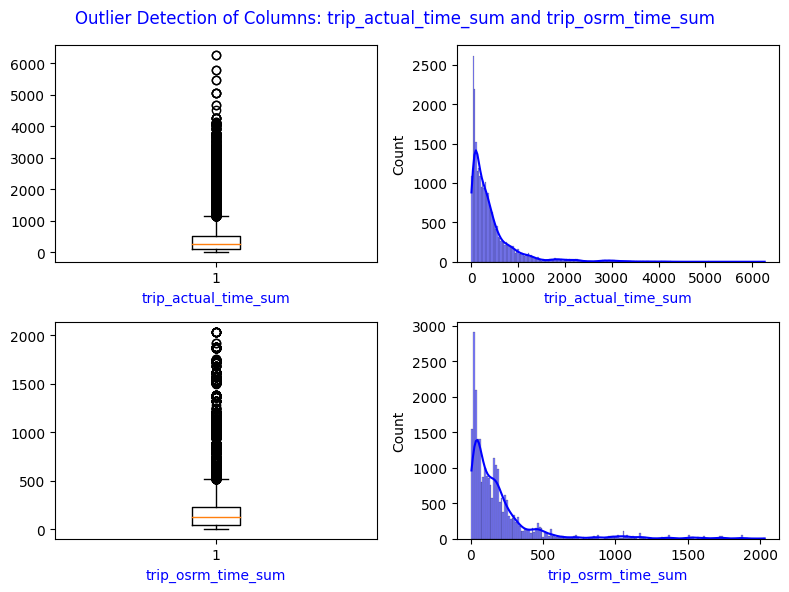

In [ ]:
# Boxplot for 'trip_actual_time_sum', 'trip_osrm_time_sum'.

plt.figure(figsize=(8, 6))

# trip_actual_time_sum
plt.subplot(2, 2, 1)
plt.boxplot(segment_df['trip_actual_time_sum'])
plt.xlabel('trip_actual_time_sum', color="blue", fontsize=10)

plt.subplot(2, 2, 2)
sns.histplot(segment_df['trip_actual_time_sum'], kde=True, color="blue")
plt.xlabel('trip_actual_time_sum', color="blue", fontsize=10)

# trip_osrm_time_sum

plt.subplot(2, 2, 3)
plt.boxplot(segment_df['trip_osrm_time_sum'])
plt.xlabel('trip_osrm_time_sum', color="blue", fontsize=10)

plt.subplot(2, 2, 4)
sns.histplot(segment_df['trip_osrm_time_sum'], kde=True, color="blue")
plt.xlabel('trip_osrm_time_sum', color="blue", fontsize=10)

plt.suptitle('Outlier Detection of Columns: trip_actual_time_sum and trip_osrm_time_sum' ,color="blue")

plt.tight_layout()
plt.show()

<font color='black'> The above plots show that both columns, trip_actual_time_sum and trip_osrm_time_sum, have many outliers. Additionally, the spread to the right indicates that these columns contain outliers with very large values.

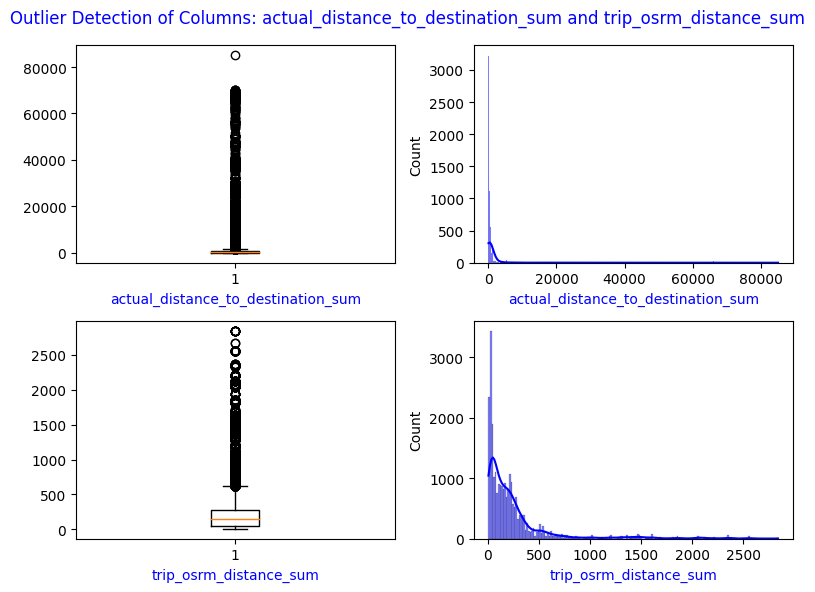

In [ ]:
# trip actual distance sum

plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.boxplot(segment_df['actual_distance_to_destination_sum'])
plt.xlabel('actual_distance_to_destination_sum', color="blue", fontsize=10)

plt.subplot(2, 2, 2)
sns.histplot(segment_df['actual_distance_to_destination_sum'], kde=True, color="blue")
plt.xlabel('actual_distance_to_destination_sum', color="blue", fontsize=10)


# trip_osrm_distance_sum

plt.subplot(2, 2, 3)
plt.boxplot(segment_df['trip_osrm_distance_sum'])
plt.xlabel('trip_osrm_distance_sum', color="blue", fontsize=10)

plt.subplot(2, 2, 4)
sns.histplot(segment_df['trip_osrm_distance_sum'], kde=True, color="blue")
plt.xlabel('trip_osrm_distance_sum', color="blue", fontsize=10)

plt.suptitle('Outlier Detection of Columns: actual_distance_to_destination_sum and trip_osrm_distance_sum' ,color="blue")
plt.tight_layout()
plt.show()



<font color='black'> The columns actual_distance_to_destination and trip_osrm_distance_sum contain many outliers. The distribution of data points shows a significant number of values that are spread far to the right.





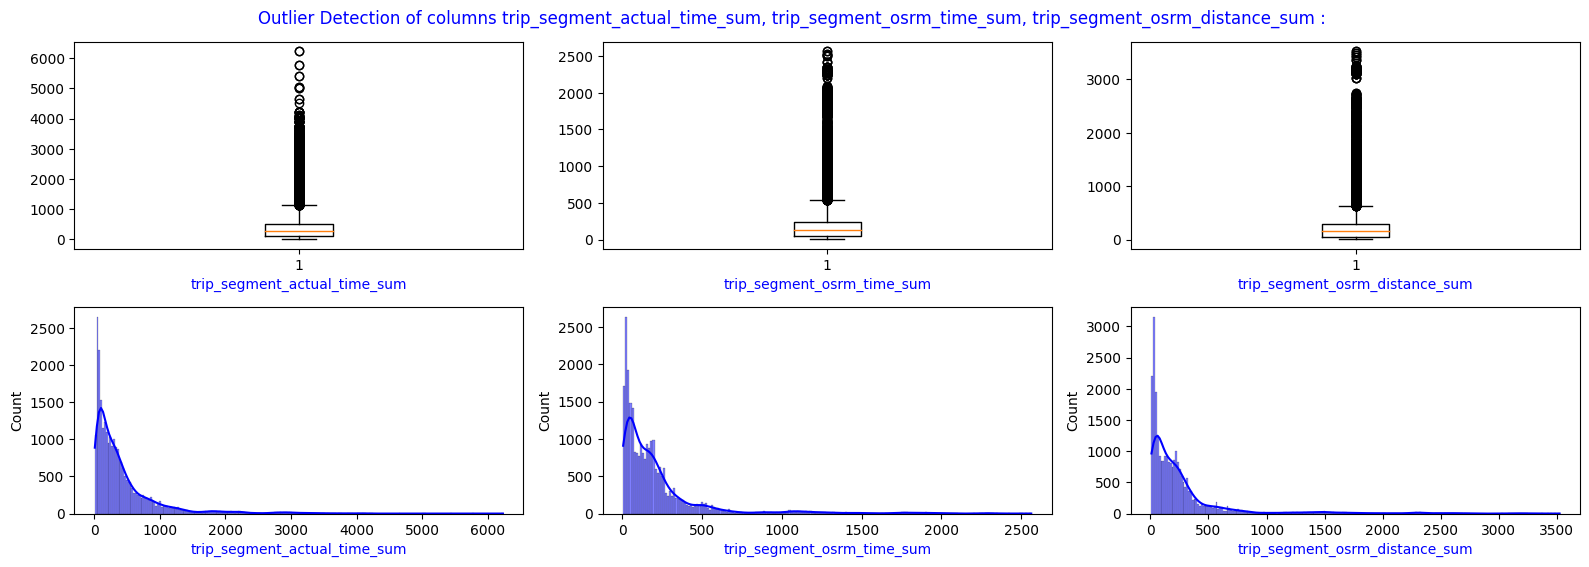

In [ ]:
# Boxplot for 'trip_segment_actual_time_sum', 'trip_segment_osrm_time_sum','trip_segment_osrm_distance_sum'

plt.figure(figsize=(16, 8))

plt.subplot(3, 3, 1)
plt.boxplot(segment_df['trip_segment_actual_time_sum'])
plt.xlabel('trip_segment_actual_time_sum', color="blue", fontsize=10)

plt.subplot(3, 3, 2)
plt.boxplot(segment_df['trip_segment_osrm_time_sum'])
plt.xlabel('trip_segment_osrm_time_sum', color="blue", fontsize=10)

plt.subplot(3, 3, 3)
plt.boxplot(segment_df['trip_segment_osrm_distance_sum'])
plt.xlabel('trip_segment_osrm_distance_sum', color="blue", fontsize=10)

# hisplot for 'trip_segment_actual_time_sum', 'trip_segment_osrm_time_sum','trip_segment_osrm_distance_sum'
plt.subplot(3, 3, 4)
sns.histplot(segment_df['trip_segment_actual_time_sum'], kde=True, color="blue")
plt.xlabel('trip_segment_actual_time_sum', color="blue", fontsize=10)
plt.suptitle('Outlier Detection' ,color="blue")

plt.subplot(3, 3,5)
sns.histplot(segment_df['trip_segment_osrm_time_sum'], kde=True, color="blue")
plt.xlabel('trip_segment_osrm_time_sum', color="blue", fontsize=10)

plt.subplot(3, 3,6)
sns.histplot(segment_df['trip_segment_osrm_distance_sum'], kde=True, color="blue")
plt.xlabel('trip_segment_osrm_distance_sum', color="blue", fontsize=10)

plt.suptitle('Outlier Detection of columns trip_segment_actual_time_sum, trip_segment_osrm_time_sum, trip_segment_osrm_distance_sum : ' ,color="blue")
plt.tight_layout()
plt.show()



<font color='black'> If we observe the plot of the columns trip_segment_actual_time_sum, trip_segment_osrm_time_sum, and trip_segment_osrm_distance_sum, we can see the spread of data points, indicating that these columns contain a significant number of outliers.

In [ ]:
# Remove Outlier
# trip_actual_time_sum
Q1 = segment_df['trip_actual_time_sum'].quantile(0.25)
Q3 = segment_df['trip_actual_time_sum'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
segment_df = segment_df[(segment_df['trip_actual_time_sum'] >= lower_limit) & (segment_df['trip_actual_time_sum'] <= upper_limit)]

# trip_osrm_time_sum
Q1 = segment_df['trip_osrm_time_sum'].quantile(0.25)
Q3 = segment_df['trip_osrm_time_sum'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
segment_df = segment_df[(segment_df['trip_osrm_time_sum'] >= lower_limit) & (segment_df['trip_osrm_time_sum'] <= upper_limit)]


Text(0.5, 0, 'trip_osrm_time_sum')

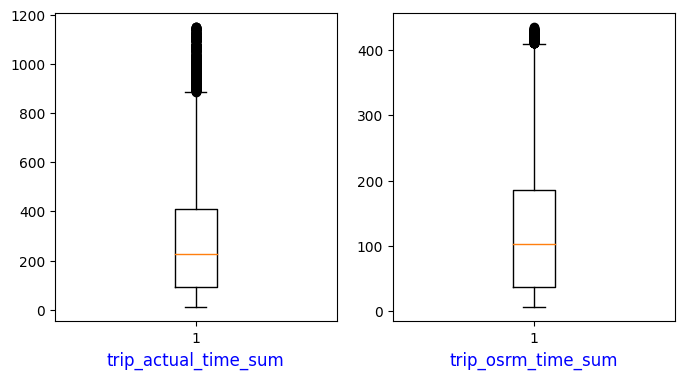

In [ ]:
# Boxplot for 'trip_actual_time_sum', 'trip_osrm_time_sum', 'trip_osrm_distance_sum',

plt.figure(figsize=(8, 4))

# trip_actual_time_sum
plt.subplot(1, 2, 1)
plt.boxplot(segment_df['trip_actual_time_sum'])
plt.xlabel('trip_actual_time_sum', color="blue", fontsize=12)

# trip_osrm_time_sum
plt.subplot(1, 2, 2)
plt.boxplot(segment_df['trip_osrm_time_sum'])
plt.xlabel('trip_osrm_time_sum', color="blue", fontsize=12)


In [ ]:
# trip_actual_distance_sum
Q1= segment_df['actual_distance_to_destination_sum'].quantile(0.25)
Q3 = segment_df['actual_distance_to_destination_sum'].quantile(0.75)
IQR= Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
segment_df = segment_df[-(segment_df['actual_distance_to_destination_sum'] < lower_limit) | (segment_df['actual_distance_to_destination_sum'] > upper_limit)]


# trip_osrm_distance_sum
Q1= segment_df['trip_osrm_distance_sum'].quantile(0.25)
Q3 = segment_df['trip_osrm_distance_sum'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
segment_df = segment_df[-(segment_df['trip_osrm_distance_sum'] < lower_limit) | (segment_df['trip_osrm_distance_sum'] > upper_limit)]


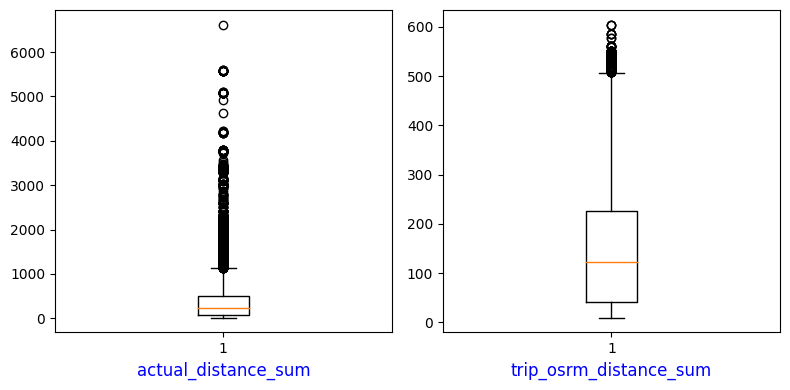

In [ ]:
# trip_actual_distance_sum
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.boxplot(segment_df['actual_distance_to_destination_sum'])
plt.xlabel('actual_distance_sum', color="blue", fontsize=12)

# trip_osrm_distance_sum

plt.subplot(1, 2, 2)
plt.boxplot(segment_df['trip_osrm_distance_sum'])
plt.xlabel('trip_osrm_distance_sum', color="blue", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Remove Outlier

# trip_segment_time_sum
Q1 = segment_df['trip_segment_actual_time_sum'].quantile(0.25)
Q3 = segment_df['trip_segment_actual_time_sum'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
segment_df = segment_df[-(segment_df['trip_segment_actual_time_sum'] < lower_limit) | (segment_df['trip_segment_actual_time_sum'] > upper_limit)]

# trip_segment_osrm_time_sum
Q1 = segment_df['trip_segment_osrm_time_sum'].quantile(0.25)
Q3 = segment_df['trip_segment_osrm_time_sum'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
segment_df = segment_df[-(segment_df['trip_segment_osrm_time_sum'] < lower_limit) | (segment_df['trip_segment_osrm_time_sum'] > upper_limit)]

# trip_segment_osrm_distance_sum
Q1= segment_df['trip_segment_osrm_distance_sum'].quantile(0.25)
Q3 = segment_df['trip_segment_osrm_distance_sum'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
segment_df = segment_df[-(segment_df['trip_segment_osrm_distance_sum'] < lower_limit) | (segment_df['trip_segment_osrm_distance_sum'] > upper_limit)]


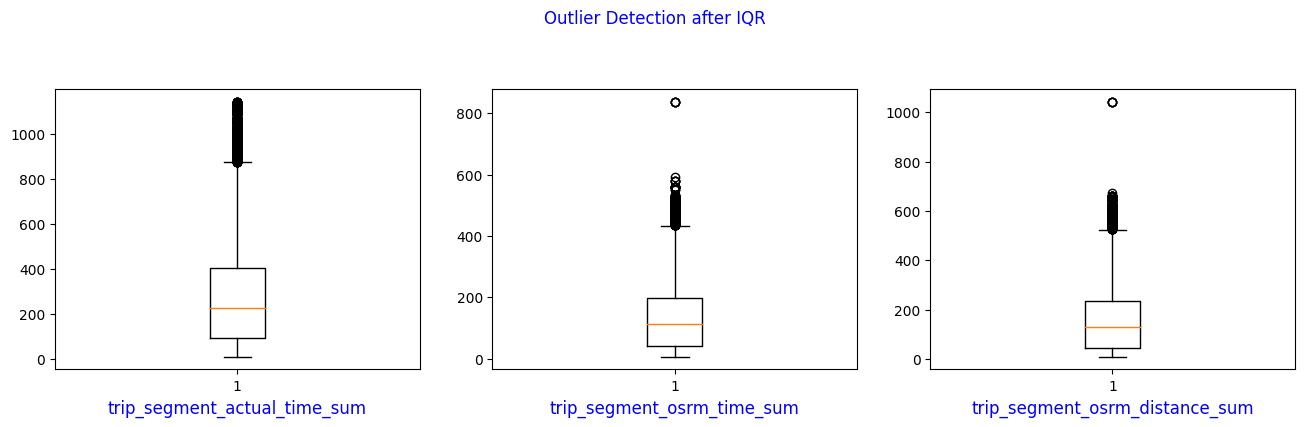

In [ ]:
# Boxplot for 'trip_segment_actual_time_sum', 'trip_segment_osrm_time_sum','trip_segment_osrm_distance_sum',

plt.figure(figsize=(16, 8))

# trip_segment_actual_time_sum
plt.subplot(2, 3, 1)
plt.boxplot(segment_df['trip_segment_actual_time_sum'])
plt.xlabel('trip_segment_actual_time_sum', color="blue", fontsize=12)

# trip_segment_osrm_time_sum
plt.subplot(2, 3, 2)
plt.boxplot(segment_df['trip_segment_osrm_time_sum'])
plt.xlabel('trip_segment_osrm_time_sum', color="blue", fontsize=12)

# trip_segment_osrm_distance_sum

plt.subplot(2, 3, 3)
plt.boxplot(segment_df['trip_segment_osrm_distance_sum'])
plt.xlabel('trip_segment_osrm_distance_sum', color="blue", fontsize=12)

plt.suptitle('Outlier Detection after IQR' ,color="blue")
plt.show()



<font color='black'> After removing the outliers, we can observe that the number of outliers has decreased.

In [ ]:
# Categorical columns of datafram

cat_col = segment_df.dtypes=="object"
cat_col = list(cat_col[cat_col].index)
cat_col


['segment_key',
 'data',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'destination_center',
 'source_state',
 'source_city',
 'source_place',
 'source_code',
 'destination_state',
 'destination_city',
 'destination_place',
 'destination_code']

In [ ]:
segment_df[cat_col].sample()

,segment_key,data,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,source_state,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code
9186,trip-153733050554747982-IND517583AAA-IND516101AAA,training,thanos::sroute:cce26bb2-2365-4c9c-88f4-74322d1...,Carting,trip-153733050554747982,IND517583AAA,IND516101AAA,Andhra Pradesh,Puttur,Artmclny,D,Andhra Pradesh,Koduru,MGRoad,D


<font color='black'> **One hot encoding on categorical columns**



In [ ]:
from sklearn.preprocessing import LabelEncoder

col="data"
label_encoder=LabelEncoder()
segment_df[col]=label_encoder.fit_transform(segment_df[col])

In [ ]:
segment_df[col].value_counts()

,count
data,
1,18893
0,7329


In [ ]:
segment_df["route_type"]=label_encoder.fit_transform(segment_df["route_type"])
segment_df["route_type"].value_counts()

,count
route_type,
1,13798
0,12424


In [ ]:
segment_df[["data","route_type"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 23240 entries, 2 to 26221
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   data        23240 non-null  int64
 1   route_type  23240 non-null  int64
dtypes: int64(2)
memory usage: 544.7 KB


<font color='black'> We can observe that after applying one-hot encoding to the data and route_type columns, the data type has changed from object to int.

In [ ]:
# Numeric columns of segment_df
num_col = segment_df.dtypes=="float64"
num_col = list(num_col[num_col].index)
num_df=segment_df[num_col]

<font color='black'> **Normalize/ Standardize the numerical features using StandardScaler.**

In [ ]:
# trip_actual_time_sum
# calculate the minimum and maximum values of the variable
min_value = num_df['trip_actual_time_sum'].min()
max_value = num_df['trip_actual_time_sum'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is 9.0 and Max value is 1149.0


In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scale = StandardScaler()
num_df["scaled_trip_actual_time_sum"] = standard_scale.fit_transform(num_df[['trip_actual_time_sum']])

<ipython-input-59-fb130d09aa9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df["scaled_trip_actual_time_sum"] = standard_scale.fit_transform(num_df[['trip_actual_time_sum']])


In [ ]:
min_value = num_df['scaled_trip_actual_time_sum'].min()
max_value = num_df['scaled_trip_actual_time_sum'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is -1.1851678952674702 and Max value is 3.687852307078432


In [ ]:
# trip_osrm_time_sum
min_value = num_df['trip_osrm_time_sum'].min()
max_value = num_df['trip_osrm_time_sum'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is 6.0 and Max value is 434.0


In [ ]:
num_df["scaled_trip_osrm_time_sum"] = standard_scale.fit_transform(num_df[['trip_osrm_time_sum']])

min_value = num_df['scaled_trip_osrm_time_sum'].min()
max_value = num_df['scaled_trip_osrm_time_sum'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is -1.2095129310997053 and Max value is 3.107797549435848


<ipython-input-62-6742ed8d348a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df["scaled_trip_osrm_time_sum"] = standard_scale.fit_transform(num_df[['trip_osrm_time_sum']])


In [ ]:
# trip_actual_distance_sum
min_value = num_df['actual_distance_to_destination_sum'].min()
max_value = num_df['actual_distance_to_destination_sum'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is 9.00246144174878 and Max value is 6619.055121497286


In [ ]:
num_df['scaled_trip_actual_time_sum']= standard_scale.fit_transform(num_df[['actual_distance_to_destination_sum']])

min_value = num_df['scaled_trip_actual_time_sum'].min()
max_value = num_df['scaled_trip_actual_time_sum'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is -0.7246740294242073 and Max value is 11.934408036359667


<ipython-input-64-da87f9323bb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['scaled_trip_actual_time_sum']= standard_scale.fit_transform(num_df[['actual_distance_to_destination_sum']])


In [ ]:
# trip_osrm_distance_sum

min_value = num_df['trip_osrm_distance_sum'].min()
max_value = num_df['trip_osrm_distance_sum'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is 9.0729 and Max value is 604.4885


In [ ]:
num_df["scaled_trip_osrm_distance_sum"] = standard_scale.fit_transform(num_df[['trip_osrm_distance_sum']])
min_value= num_df['scaled_trip_osrm_distance_sum'].min()
max_value = num_df['scaled_trip_osrm_distance_sum'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is -1.139119752146302 and Max value is 3.6682950635440985


<ipython-input-66-df021e27a6bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df["scaled_trip_osrm_distance_sum"] = standard_scale.fit_transform(num_df[['trip_osrm_distance_sum']])


In [ ]:
#  trip_segment_actual_time_sum

min_value = num_df['trip_segment_actual_time_sum'].min()
max_value = num_df['trip_segment_actual_time_sum'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is 9.0 and Max value is 1143.0


In [ ]:
num_df["scaled_trip_segment_actual_time_sum"] = standard_scale.fit_transform(num_df[['trip_segment_actual_time_sum']])
min_value = num_df['scaled_trip_segment_actual_time_sum'].min()
max_value = num_df['scaled_trip_segment_actual_time_sum'].max()

print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is -1.180981734556477 and Max value is 3.6913460063903716


<ipython-input-68-e3b2260274fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df["scaled_trip_segment_actual_time_sum"] = standard_scale.fit_transform(num_df[['trip_segment_actual_time_sum']])


In [ ]:
# trip_segment_osrm_time_sum

min_value = num_df['trip_segment_osrm_time_sum'].min()
max_value = num_df['trip_segment_osrm_time_sum'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is 6.0 and Max value is 836.0


In [ ]:
num_df["scaled_trip_segment_osrm_time_sum"] = standard_scale.fit_transform(num_df[['trip_segment_osrm_time_sum']])

min_value = num_df['scaled_trip_segment_osrm_time_sum'].min()
max_value = num_df['scaled_trip_segment_osrm_time_sum'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is -1.1926573459045315 and Max value is 6.406055165448478


<ipython-input-70-46d397d7fa99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df["scaled_trip_segment_osrm_time_sum"] = standard_scale.fit_transform(num_df[['trip_segment_osrm_time_sum']])


In [ ]:
# trip_segment_osrm_distance_sum

min_value = num_df['trip_segment_osrm_distance_sum'].min()
max_value = num_df['trip_segment_osrm_distance_sum'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is 9.0729 and Max value is 1040.8056


In [ ]:
num_df["scaled_trip_segment_osrm_distance_sum"] = standard_scale.fit_transform(num_df[['trip_segment_osrm_distance_sum']])

min_value = num_df['scaled_trip_segment_osrm_distance_sum'].min()
max_value = num_df['scaled_trip_segment_osrm_distance_sum'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is -1.134332190234546 and Max value is 6.697735392878592


<ipython-input-72-d80550fcc00d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df["scaled_trip_segment_osrm_distance_sum"] = standard_scale.fit_transform(num_df[['trip_segment_osrm_distance_sum']])


In [ ]:
# trip_total_time

min_value = num_df['trip_total_time'].min()
max_value = num_df['trip_total_time'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is 0.3910244747222222 and Max value is 56.51645870777777


In [ ]:
num_df['scaled_trip_total_time'] = standard_scale.fit_transform(num_df[['trip_total_time']])
min_value = num_df['scaled_trip_total_time'].min()
max_value = num_df['scaled_trip_total_time'].max()
print(f" Min value is {min_value} and Max value is {max_value}")

 Min value is -1.2753413213717695 and Max value is 8.081055235528812


<ipython-input-74-bd8f8227698f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['scaled_trip_total_time'] = standard_scale.fit_transform(num_df[['trip_total_time']])


# <font color='red'>Hypothesis Testing:</font>




In [ ]:
 # Trip Actual Aggregated time and OSRM Aggregated time.

num_df[["trip_actual_time_sum" , "trip_osrm_time_sum" , "actual_distance_to_destination" , "trip_osrm_distance_sum" , "trip_segment_actual_time_sum" , "trip_segment_osrm_time_sum" ,"trip_segment_osrm_distance_sum" , "trip_total_time"  ]].describe()

,trip_actual_time_sum,trip_osrm_time_sum,actual_distance_to_destination,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time
count,23240.000000,23240.000000,23240.000000,23240.000000,23240.000000,23240.000000,23240.000000,23240.000000
mean,286.259552,125.906024,178.899664,150.156975,283.865189,136.272806,158.500570,8.041308
std,233.946194,99.137926,406.075982,123.856258,232.747972,109.231381,131.734678,5.998746
min,9.000000,6.000000,9.001351,9.072900,9.000000,6.000000,9.072900,0.391024
25%,92.000000,37.000000,45.780269,40.269675,91.000000,41.000000,43.290700,3.224071
50%,228.000000,103.000000,61.526688,121.709400,226.000000,113.000000,129.267800,6.320368
75%,410.000000,186.000000,134.225085,226.547400,405.000000,198.000000,235.958000,11.733147
max,1149.000000,434.000000,6619.055121,604.488500,1143.000000,836.000000,1040.805600,56.516459


<font color='black'> We can see that the mean value of actual time spent on package delivery differs from the mean value of OSRM time. The actual aggregate time is significantly larger than the OSRM aggregate time at both the trip and segment levels.

<font color='black'> Similarly, the mean value of the actual distance covered to deliver a package is much larger than the mean value of OSRM distance at both the trip and segment levels.

<font color='black'> To assess the significant difference between the means, we will conduct a statistical test.


In [ ]:
# h0: Trip Actual Aggregated Time is equal to Trip OSRM Aggregated Time
# h1: Trip Actual Aggregated Time is Greater than the Trip OSRM Aggregated Time

from scipy.stats import ttest_rel, ttest_ind
tstat , p_val = ttest_rel(num_df["trip_actual_time_sum"] , num_df["trip_osrm_time_sum"] , alternative="greater")
print("tstat :",f"{tstat}")
print("p_value :",f"{p_val}")

tstat : 150.90986158509034
p_value : 0.0


In [ ]:
if p_val<0.05:
    print("Reject null hypothesis")
    print("Actual Aggregated Time to deliver a package is greater than the OSRM Aggregated Time")
else:
    print("Accept null hypothesis")
    print("Actual Time to deliver a package is Equal to the OSRM Time")

Reject null hypothesis
Actual Aggregated Time to deliver a package is greater than the OSRM Aggregated Time


In [ ]:
# Actual Aggregated Time and Segment Aggregated Time.
# h0: Actual Aggregate Time is Equal to Segment Aggregated Time
# h1: Actual Aggregated time is Greater than Segmen Agrregated Time

tstats , p_val= ttest_rel(num_df["trip_actual_time_sum"],num_df["trip_segment_actual_time_sum"], alternative="greater")
print("tstat :",f"{tstats}")
print("p_value :",f"{p_val}")

tstat : 120.77582147153326
p_value : 0.0


In [ ]:
if p_val<0.05:
    print("Reject null hypothesis")
    print("Actual Aggregated Time to deliver a package is Greater than the Segment Aggregated Time")
else:
    print("Accept null hypothesis")
    print("Actual Aggregated Time to deliver a package is lesser or equal to the Segment Aggregated Time")

Reject null hypothesis
Actual Aggregated Time to deliver a package is Greater than the Segment Aggregated Time


In [ ]:
#  Actual Distance Aggregated value and  OSRM Distance Aggregated value
 # h0: Actual Aggregated Distance equal to OSRM Aggregated Distance
 # h1: Actual Aggregated Distance greater than OSRM Aggregated Distance

tstats , p_val= ttest_rel(num_df["actual_distance_to_destination_sum"],num_df["trip_osrm_distance_sum"], alternative="greater")
print("tstat :",f"{tstats}")
print("p_value :",f"{p_val}")

tstat : 84.53552960484753
p_value : 0.0


In [ ]:
if p_val<0.05:
    print("Reject null hypothesis")
    print("Actual Aggregated Distance to deliver a package is Greater than the OSRM Aggregated Distance")
else:
    print("Accept null hypothesis")
    print("Actual Aggregated Distance to deliver a package is lesser or equal to the OSRM Aggregated Distance")

Reject null hypothesis
Actual Aggregated Distance to deliver a package is Greater than the OSRM Aggregated Distance


In [ ]:
# OSRM Aggrgated distance and Segment OSEM aggregated Distance

# h0: Trip OSRM Aggrgated Distance is equal to Segment OSRM Aggregated Distance
# h1: Trip OSRM Aggregated Distance less than the Segment OSRM Aggregated Distance

tstats , p_val= ttest_rel(num_df["trip_osrm_distance_sum"] , num_df["trip_segment_osrm_distance_sum"], alternative="less")
print("tstat :",f"{tstats}")
print("p_value :",f"{p_val}")

tstat : -53.93936261948717
p_value : 0.0


In [ ]:
if p_val<0.05:
    print("Reject null hypothesis")
    print("Trip OSRM Aggregated Distance to deliver a package is lesser than the Segment OSRM Aggregated Distance ")
else:
    print("Accept null hypothesis")
    print("Trip OSRM Aggregated Distance to deliver a package is greater or equal to the Segment Aggregated Distance")

Reject null hypothesis
Trip OSRM Aggregated Distance to deliver a package is lesser than the Segment OSRM Aggregated Distance 


In [ ]:
# OSRM Aggregated Time and Segment OSRM Aggregated Time.
# h0: OSRM Aggregated Time is Equal to Segment Aggregated Time
# h1: OSRM Aggregated time is Greater than Segmen Agrregated Time

tstats , p_val= ttest_rel(num_df["trip_osrm_time_sum"] , num_df["trip_segment_osrm_time_sum"], alternative="less")
print("tstat :",f"{tstats}")
print("p_value :",f"{p_val}")

tstat : -66.8925633080991
p_value : 0.0


In [ ]:
if p_val<0.05:
    print("Reject null hypothesis")
    print("OSRM Aggregated Time to deliver a package is lesser than the Segment OSRM Aggregated Time")
else:
    print("Accept null hypothesis")
    print("OSRM Aggregated Time to deliver a package is greater or equal to the Segment Aggregated Time")

Reject null hypothesis
OSRM Aggregated Time to deliver a package is lesser than the Segment OSRM Aggregated Time


 <font color='black'>  **Conclusion:**

<font color='black'> 1. Time Analysis: The actual aggregated time for package delivery is consistently greater than both the OSRM aggregated time and the segment aggregated time. This suggests that the real-world delivery times are longer than the estimates provided by OSRM.

<font color='black'> 2. Distance Analysis: The actual aggregated distance covered for deliveries is also greater than the OSRM aggregated distance.

<font color='black'> 3. Segment Comparison: The trip OSRM aggregated distance is less than the segment OSRM aggregated distance.

<font color='black'> The OSRM metrics generally underestimate both time and distance compared to actual values, suggesting a need for further investigation into routing accuracy and efficiency in the delivery process.

In [ ]:
# Further analysys of catocrical columns of Dataset
segment_df[cat_col].sample()

,segment_key,data,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,source_state,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code
7547,trip-153722735361373998-IND421502AAA-IND421302AAR,1,thanos::sroute:bc42a0f4-e872-450d-8419-18cc20b...,0,trip-153722735361373998,IND421502AAA,IND421302AAR,Maharashtra,Mumbai,Ambernath,Dc,Maharashtra,Mumbai,East,I_21


In [ ]:
source_states = segment_df.groupby("source_state")["trip_uuid"].nunique().sort_values(ascending=False)
source_states=pd.DataFrame(source_states).reset_index()
source_states.rename(columns={"trip_uuid":"trip_count"}, inplace=True)

In [ ]:
source_states.head(5)

,source_state,trip_count
0,Maharashtra,2416
1,Karnataka,2131
2,Haryana,1394
3,Tamil Nadu,1073
4,Telangana,738


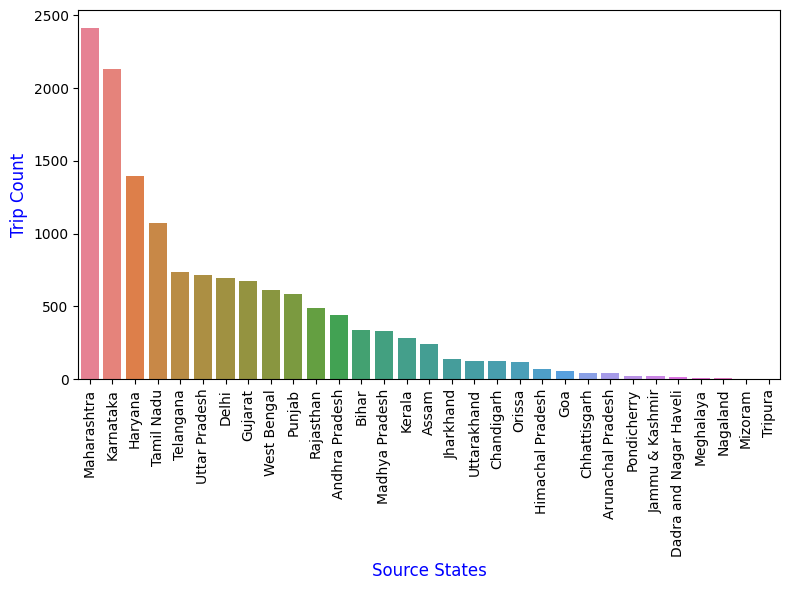

In [ ]:
# source_state
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(8,6))
sns.barplot(x="source_state",y="trip_count",data=source_states, palette="husl")
plt.xlabel("Source States",color="blue",fontsize=12)
plt.ylabel("Trip Count",color="blue",fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<font color='black'> We can observe that Maharashtra tops the list with the highest trip count (2,416) as the source state from which packages are sent to other states, followed by Karnataka (2,131) and Haryana (1,394). Tamil Nadu, Telangana, and Uttar Pradesh also have a high number of trip counts.

In [ ]:
destination_states = segment_df.groupby("destination_state")["trip_uuid"].nunique().sort_values(ascending=False)
destination_states=pd.DataFrame(destination_states).reset_index()
destination_states.rename(columns={"trip_uuid":"trip_count"}, inplace=True)

In [ ]:
destination_states.head(5)

,destination_state,trip_count
0,Maharashtra,2390
1,Karnataka,2205
2,Haryana,1390
3,Tamil Nadu,1057
4,Uttar Pradesh,727


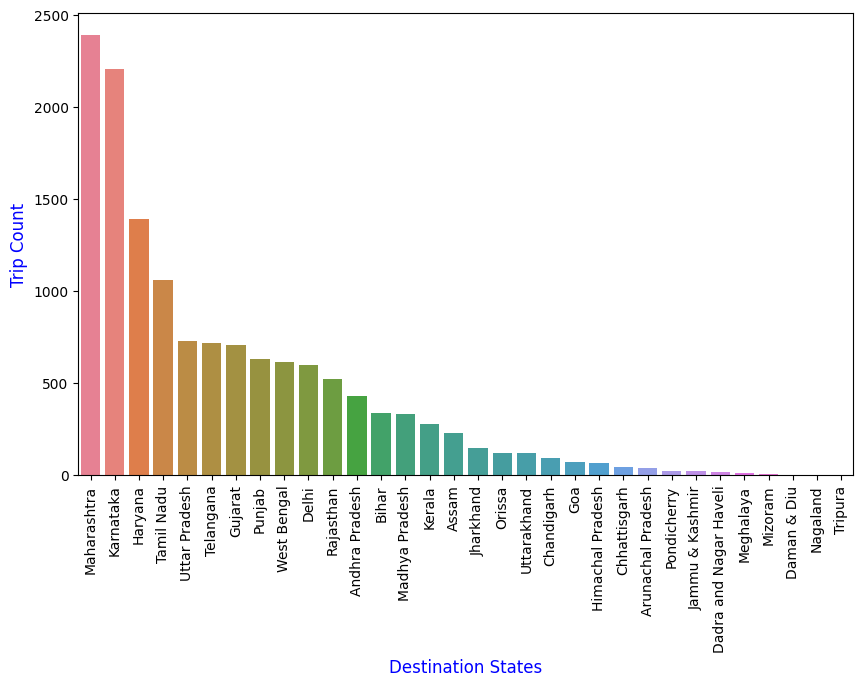

In [ ]:
# Destination states

plt.figure(figsize=(10,6))
sns.barplot(x="destination_state",y="trip_count",data=destination_states, palette="husl")
plt.xlabel("Destination States",color="blue",fontsize=12)
plt.ylabel("Trip Count",color="blue",fontsize=12)
plt.xticks(rotation=90)
plt.show()

<font color='black'> We can observe that Maharashtra tops the list with the highest trip count (2,390) as the destination state where packages are sent, followed by Karnataka (2,205) and Haryana (1,390). Tamil Nadu, Telangana, and Uttar Pradesh also have a high number of trip counts.

<font color='black'> **Creating new column corridor_id by concatinating "source_center" and "destination_center" to analysys the most functional corridor.**

In [ ]:
segment_df["corridor_id"] = segment_df["source_center"] + "_" + segment_df["destination_center"]
segment_df["corridor_id"].nunique()

2597

In [ ]:
# Number of trips between the two corridors

busiest_corridor=segment_df.groupby("corridor_id")["trip_uuid"].nunique().sort_values(ascending=False)
busiest_corridor=pd.DataFrame(busiest_corridor).reset_index()
busiest_corridor.rename(columns={"trip_uuid":"trip_count"},inplace=True)
busiest_corridor

,corridor_id,trip_count
0,IND562132AAA_IND560300AAA,151
1,IND560099AAB_IND560300AAA,121
2,IND562132AAA_IND560099AAB,112
3,IND560300AAA_IND562132AAA,108
4,IND421302AAG_IND400072AAB,105
...,...,...
2592,IND121004AAB_IND121002AAA,1
2593,IND721139AAC_IND721636AAB,1
2594,IND390020AAA_IND390018AAB,1
2595,IND721253AAC_IND721501AAC,1


<font color='black'> We have 2,597 unique corridor and the corresponding trip counts for each corridor. The corridor IND562132AAA_IND560300AAA tops the list with 151 trips, followed by IND560099AAB_IND560300AAA with 121 trips, and IND562132AAA_IND560099AAB with 112 trips.

In [ ]:
# Creating a corridor DataFrame for further analysis.

corridor_df= segment_df[['corridor_id', 'trip_uuid' ,'source_state','destination_state', 'actual_time', 'actual_distance_to_destination', 'osrm_time','osrm_distance', 'segment_actual_time_cumsum','segment_osrm_time_cumsum', 'segment_osrm_distance_cumsum']]

In [ ]:
corridor_df.sample()

,corridor_id,trip_uuid,source_state,destination_state,actual_time,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum
1301,IND600044AAD_IND600048AAA,trip-153679738749092963,Tamil Nadu,Tamil Nadu,99.0,22.040851,12.0,15.2372,98.0,21.0,18.594


In [ ]:
# Average actual time taken by each corridor.

corr_avg_actual_time= corridor_df.groupby("corridor_id")["segment_actual_time_cumsum"].mean()
corr_avg_actual_time=pd.DataFrame(corr_avg_actual_time).reset_index()
corr_avg_actual_time.rename(columns={"segment_actual_time_cumsum":"corr_avg_actual_time"},inplace=True)
corr_avg_actual_time.sort_values(by="corr_avg_actual_time",ascending=False).head(5)

,corridor_id,corr_avg_actual_time
2270,IND743270AAA_IND712311AAA,1104.0
352,IND176310AAA_IND145001AAA,1002.5
447,IND212402AAA_IND211002AAB,1000.5
1645,IND562132AAA_IND683511AAA,971.5
1082,IND421302AAG_IND444005AAB,927.4


In [ ]:
top_corr_avg_actual_time= corr_avg_actual_time.sort_values(by="corr_avg_actual_time",ascending=False).head(20)

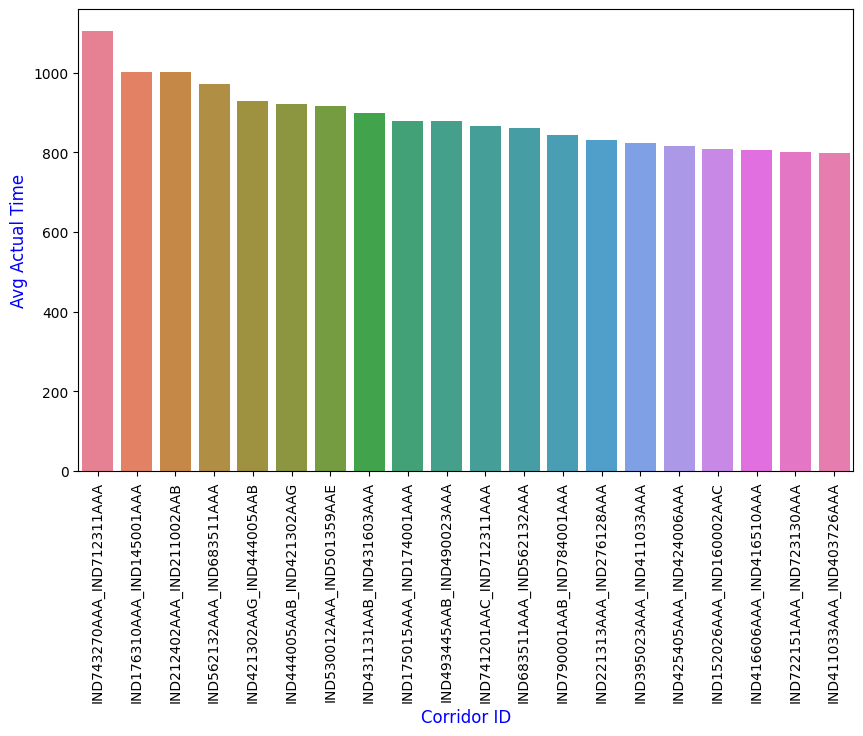

In [ ]:
# top 20 corrodor :Avg actual time taken

plt.figure(figsize=(10,6))
sns.barplot(x="corridor_id",y="corr_avg_actual_time",data=top_corr_avg_actual_time, palette="husl")
plt.xlabel("Corridor ID",color="blue",fontsize=12)
plt.ylabel("Avg Actual Time",color="blue",fontsize=12)
plt.xticks(rotation=90)
plt.show()

<font color='black'> We can see that the corridor IND743270AAA_IND712311AAA has the highest average time taken to deliver a package (1,104.0), followed by IND176310AAA_IND145001AAA (1,002.5), IND212402AAA_IND211002AAB (1,000.5), and IND562132AAA_IND683511AAA (971.5).

In [ ]:
# Avg OSRM Time

corr_avg_osrm_time= corridor_df.groupby("corridor_id")["segment_osrm_time_cumsum"].mean()
corr_avg_osrm_time=pd.DataFrame(corr_avg_osrm_time).reset_index()
corr_avg_osrm_time.rename(columns={"segment_osrm_time_cumsum":"corr_avg_osrm_time"},inplace=True)
corr_avg_osrm_time.sort_values(by="corr_avg_osrm_time",ascending=False).head(5)

,corridor_id,corr_avg_osrm_time
1645,IND562132AAA_IND683511AAA,544.000
2048,IND683511AAA_IND562132AAA,510.400
1622,IND562132AAA_IND501359AAE,456.875
1316,IND501359AAE_IND562132AAA,456.800
422,IND209304AAA_IND000000ACB,455.400


In [ ]:
top_corr_avg_osrm_time= corr_avg_osrm_time.sort_values(by="corr_avg_osrm_time",ascending=False).head(20)

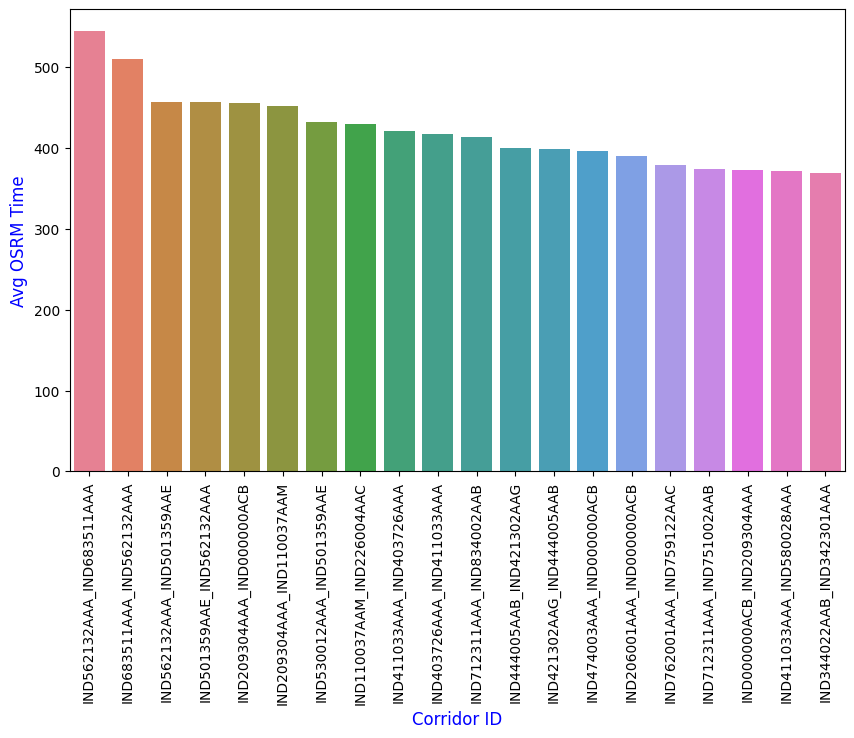

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="corridor_id",y="corr_avg_osrm_time",data=top_corr_avg_osrm_time, palette="husl")
plt.xlabel("Corridor ID",color="blue",fontsize=12)
plt.ylabel("Avg OSRM Time",color="blue",fontsize=12)
plt.xticks(rotation=90)
plt.show()

<font color='black'> The corridor IND562132AAA_IND683511AAA tops the list with the highest average OSRM time (544), followed by IND683511AAA_IND562132AAA (510), IND562132AAA_IND501359AAE (457), and IND501359AAE_IND562132AAA (457).

#<font color='red'>Insights:</font>

<font color='black'> * FTL (Full Truck Load) accounts for 52.5% of trips, while carting makes up 47.4%, indicating a slight preference for FTL shipments.

<font color='black'> * The actual delivery times and distances are always longer than what OSRM (Open Source Routing Machine) estimates. This difference suggests there might be problems with the routes being used, possibly because of traffic, road work, or less-than-ideal route choices.

<font color='black'> * Maharashtra is the top state for sending and receiving packages, making it a key logistics hub. The high number of trips from Karnataka and Haryana shows significant logistics activity there. By reducing delivery times and choosing optimal routes, businesses can improve efficiency and enhance their operations.

<font color='black'> * The corridor IND562132AAA_IND560300AAA has 151 trips, indicating strong demand for that route. Understanding why this route is popular could help improve services for other routes and enhance overall business performance.